In [1]:
from scipy.sparse import coo_matrix
from scipy.sparse import save_npz, load_npz
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pickle

<br>Import original 'distance' matrix: *mx* as symmetirc matrix. 

Import page categories.

In [2]:
mx = load_npz('C:\\FOLDERS\\CEU\\Capstone Project\\Data\\sparse_matrix.npz')

In [3]:
mx_array = mx.toarray()

In [4]:
g = open("page_categories.pkl", "rb")
temp = pickle.load(g)
g.close()

In [5]:
categories = []

for key in temp:
    categories.append(temp[key])

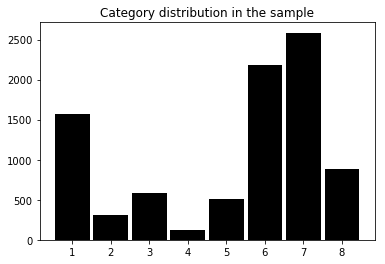

In [6]:
temp = np.array(categories)
bins = [1,2,3,4,5,6,7,8, 9]
plt.hist(temp, align = 'left', bins= bins, rwidth = 0.9, color = "k")
plt.title("Category distribution in the sample")
plt.show()

<br>
## Transform matrix elements
Replacing number of shared users with correlations: mx[i,j] = 1- corr(mx[i,], mx[,j]) thereby creating a *dissimilarity matrix*.

In [6]:
mx_corr = np.zeros((8743, 8743))

In [7]:
for i in range(0, 8742):
    for j in range(i+1, 8743):
        mx_corr[i,j] = 1 - np.corrcoef(mx_array[i, :], mx_array[: , j])[1,0]

In [9]:
np.savetxt("C:\\FOLDERS\\CEU\\Capstone Project\\Data\\mx_correlation_dissimilarity.gz", mx_corr, delimiter=',')

<br>
## Scipy Hierarchy Clustering

Getting upper triangular values.

In [71]:
l = [] # list for upper triangular (ex-diagonal) values

for i in range(0, 8743):
    for j in range(i + 1, 8743):
        l.append(mx_corr[i,j])

<br>
Note: with the dissimilarity matrix being drawn from correlations, only the '*ward*' method resulted in meaningful clusters. 

<br>
### Running clusters:
- linkage method: **'ward'**.

In [73]:
Z = linkage(l, method="ward")

- crosstabs

In [74]:
k=8
scipy_hier_labels = fcluster(Z, k, criterion='maxclust')
page_labels = pd.DataFrame(scipy_hier_labels, columns=["labels"])
cat = pd.Series(categories)
page_labels['category'] = cat.values
ct = pd.crosstab(page_labels["labels"], page_labels["category"])
ct

category,1,2,3,4,5,6,7,8
labels,,,,,,,,
1,32,0,0,0,0,9,31,419
2,622,15,4,2,8,323,325,186
3,1,10,262,6,1,13,30,2
4,50,49,41,12,27,332,51,48
5,61,8,0,2,36,69,176,44
6,31,5,4,1,92,78,512,2
7,63,10,1,9,30,89,98,63
8,706,214,267,93,316,1268,1362,122


- plotting clusters vs original labels

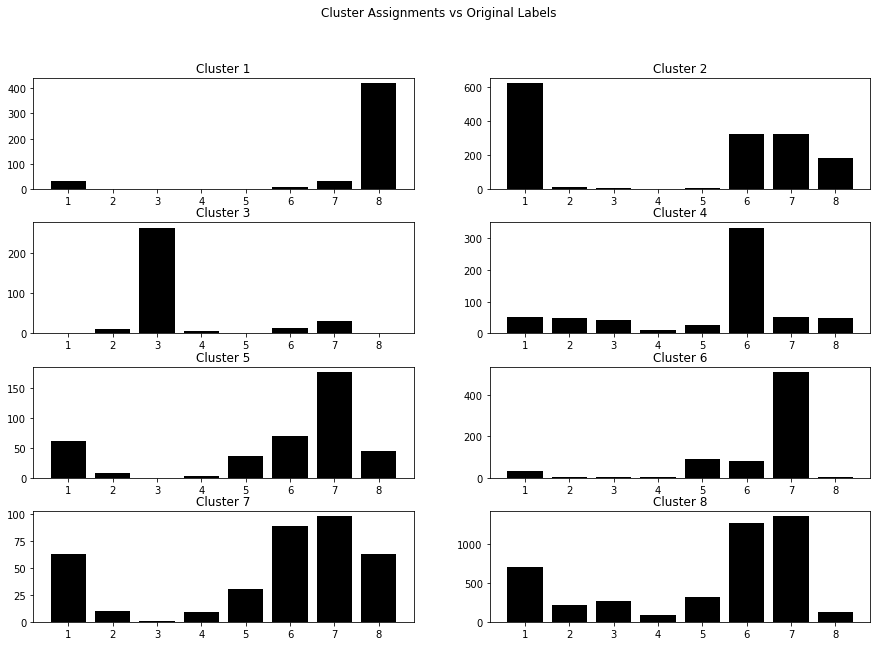

In [75]:
clusters = []

for i in range(0,8):
    clusters.append(ct.iloc[i].tolist())

fig, axes = plt.subplots(4, 2, figsize = (15,10))
fig.subplots_adjust(hspace = .3, wspace=.2)
fig.suptitle("Cluster Assignments vs Original Labels")
axes = axes.ravel()
for i in range(8):
    axes[i].bar([1,2,3,4,5,6,7,8], clusters[i], color = 'k')
    axes[i].set_title("Cluster " + str(i+1))
    axes[i].set_xticks([1,2,3,4,5,6,7,8])


As labeling in the clustering algorithm is random, we need to find the most frequent original category label within each cluster, as it should show which original category the cluster represent.

In [77]:
ctt = ct.T
lbls = list(range(1,9)) # labels given by the clustering method
c = []                  # the most frequent original category within that label
f = []                  # the frequency on that category within that particular cluster

for i in range(1,9):
    m = max(ctt[i])
    pdind = pd.Index(ctt[i])
    freq = m / sum(ctt[i])
    c.append(pdind.get_loc(m) + 1)
    f.append(round(freq,3))

assignment = pd.DataFrame({"cluster label": lbls,
                          "most frequent original category within the cluster": c,
                          "its relative frequency": f})
assignment = assignment[["cluster label", 
                         "most frequent original category within the cluster",
                        "its relative frequency"]]
assignment

,cluster label,most frequent original category within the cluster,its relative frequency
0,1,8,0.853
1,2,1,0.419
2,3,3,0.806
3,4,6,0.544
4,5,7,0.444
5,6,7,0.706
6,7,7,0.270
7,8,7,0.313


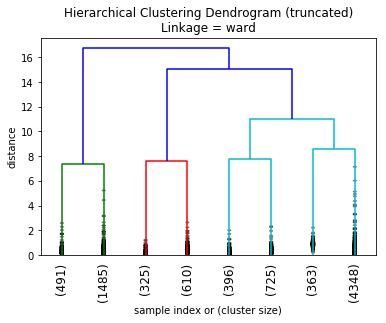

In [78]:
plt.title('Hierarchical Clustering Dendrogram (truncated)\nLinkage = ward')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=8,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

----------------------------------------------------

<br>
### Running clusters:
- linkage method: **'complete'**. 

In [94]:
Z = linkage(l, method="complete")

- crosstabs

In [95]:
k=8
scipy_hier_labels = fcluster(Z, k, criterion='maxclust')
page_labels = pd.DataFrame(scipy_hier_labels, columns=["labels"])
cat = pd.Series(categories)
page_labels['category'] = cat.values
ct = pd.crosstab(page_labels["labels"], page_labels["category"])
ct

category,1,2,3,4,5,6,7,8
labels,,,,,,,,
1,303,28,19,29,18,469,264,107
2,8,57,305,18,27,213,64,18
3,36,5,0,0,22,34,105,29
4,402,148,139,30,177,440,536,31
5,14,6,0,4,3,11,15,12
6,371,7,39,4,7,276,284,593
7,428,60,76,40,252,728,1303,88
8,4,0,1,0,4,10,14,8


- plotting clusters vs original labels

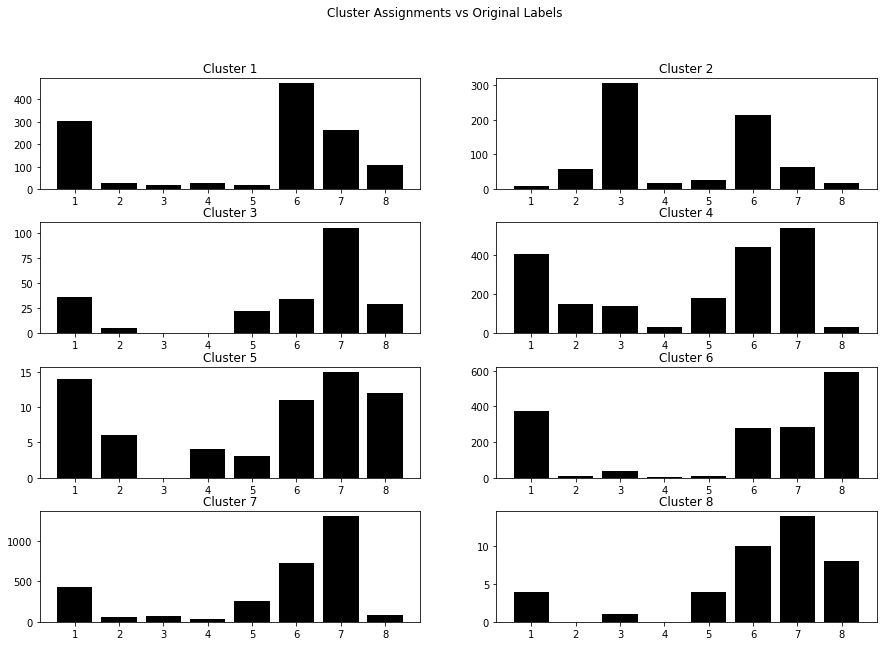

In [96]:
clusters = []

for i in range(0,8):
    clusters.append(ct.iloc[i].tolist())

fig, axes = plt.subplots(4, 2, figsize = (15,10))
fig.subplots_adjust(hspace = .3, wspace=.2)
fig.suptitle("Cluster Assignments vs Original Labels")
axes = axes.ravel()
for i in range(8):
    axes[i].bar([1,2,3,4,5,6,7,8], clusters[i], color = 'k')
    axes[i].set_title("Cluster " + str(i+1))
    axes[i].set_xticks([1,2,3,4,5,6,7,8])


As labeling in the clustering algorithm is random, we need to find the most frequent original category label within each cluster, as it should show which original category the cluster represent.

In [97]:
ctt = ct.T
lbls = list(range(1,9)) # labels given by the clustering method
c = []                  # the most frequent original category within that label
f = []                  # the frequency on that category within that particular cluster

for i in range(1,9):
    m = max(ctt[i])
    pdind = pd.Index(ctt[i])
    freq = m / sum(ctt[i])
    c.append(pdind.get_loc(m) + 1)
    f.append(round(freq,3))

assignment = pd.DataFrame({"cluster label": lbls,
                          "most frequent original category within the cluster": c,
                          "its relative frequency": f})
assignment = assignment[["cluster label", 
                         "most frequent original category within the cluster",
                        "its relative frequency"]]
assignment

,cluster label,most frequent original category within the cluster,its relative frequency
0,1,6,0.379
1,2,3,0.430
2,3,7,0.455
3,4,7,0.282
4,5,7,0.231
5,6,8,0.375
6,7,7,0.438
7,8,7,0.341


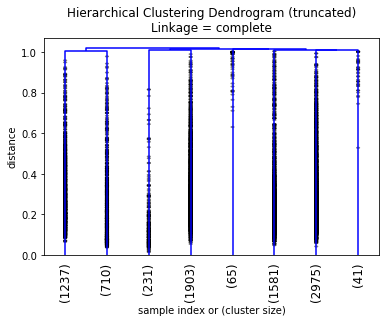

In [98]:
plt.title('Hierarchical Clustering Dendrogram (truncated)\nLinkage = complete')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=8,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

----------------------------------------------------